<a href="https://colab.research.google.com/github/w95wayne10/computer_vision/blob/master/animation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import output
import time

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
group_number_thershold = 100

In [3]:
def group_image(IDlist):
  IDlist_copy = []
  for item in IDlist:
    .copy()
  for i in range(len(IDlist_copy)-1,1,-1):
    if IDlist_copy[i]["count"]<group_number_thershold:
      IDlist_copy.pop(i)
  image = cv2.cvtColor(binarize_lena, cv2.COLOR_GRAY2BGR)
  for grp in IDlist_copy:
    if grp == 0:
      continue
    image = cv2.circle(image, 
            (int(np.round(grp["sum"][1]/grp["count"])), int(np.round(grp["sum"][0]/grp["count"]))), 
            radius=0, 
            color=(0, 0, 255), 
            thickness=10)
    image = cv2.rectangle(image, (grp["left"],grp["up"]), (grp["right"],grp["down"]), (255,0, 0), 2)
  #cv2_imshow(image)
  return image
  # cv2.imwrite('group_of_lena.bmp', image)

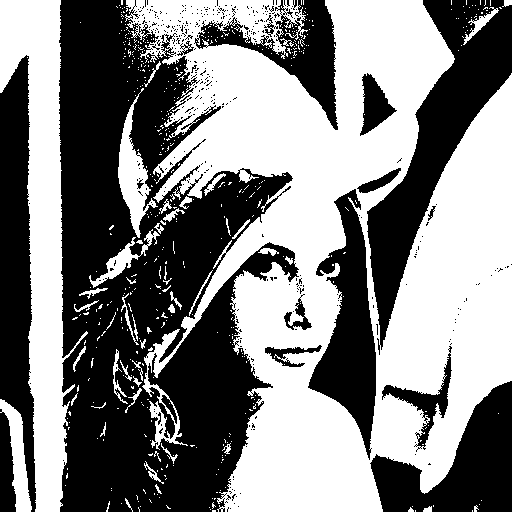

In [4]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
binarize_lena = lena_gray//128*255
cv2_imshow(binarize_lena)

In [5]:
# 分群
# 1. 分析_第一次分組
IDlist = []
IDlist.append(0)
IDtable = np.zeros((512,512),dtype=int)
ID = 1
for r, row in enumerate(binarize_lena):
  for c, pix in enumerate(row):
    if pix==0:
      continue
    if r:
      if c and IDtable[r-1,c-1]:
        IDtable[r,c] = IDtable[r-1,c-1]
      elif IDtable[r-1,c]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c])
        else:
          IDtable[r,c] = IDtable[r-1,c]
      elif c<511 and IDtable[r-1,c+1]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c+1]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c+1])
        else:
          IDtable[r,c] = IDtable[r-1,c+1]
    if c and IDtable[r,c-1]:
      if IDtable[r,c]:
        IDlist[IDtable[r,c-1]]["neighbor"].add(IDtable[r,c])
        IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r,c-1])
      else:
        IDtable[r,c] = IDtable[r,c-1]
    if not IDtable[r,c]:
      IDtable[r,c] = ID
      ID+=1
      IDlist.append({"up":512,"down":0,"left":512,"right":0,"count":0,"sum":[0,0],"neighbor":set()})
    IDlist[IDtable[r,c]]["up"] = min(IDlist[IDtable[r,c]]["up"],r)
    IDlist[IDtable[r,c]]["down"] = max(IDlist[IDtable[r,c]]["down"],r)
    IDlist[IDtable[r,c]]["left"] = min(IDlist[IDtable[r,c]]["left"],c)
    IDlist[IDtable[r,c]]["right"] = max(IDlist[IDtable[r,c]]["right"],c)
    IDlist[IDtable[r,c]]["count"] += 1
    IDlist[IDtable[r,c]]["sum"][0] += r
    IDlist[IDtable[r,c]]["sum"][1] += c

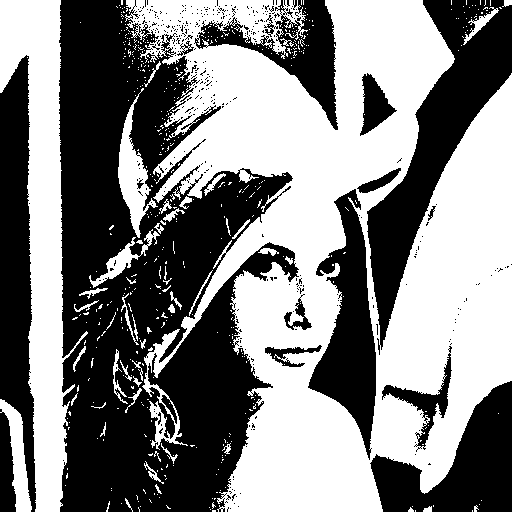

In [6]:
cv2_imshow(binarize_lena)

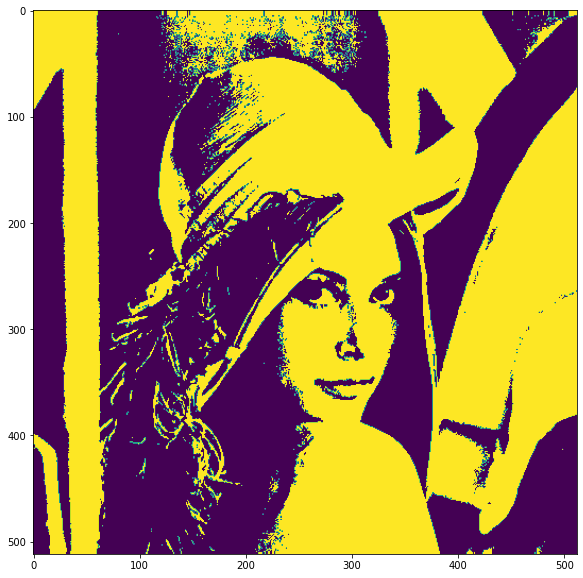

In [14]:
fig,_ = plt.subplots(figsize=(10,10))
plt.imshow(binarize_lena, cmap=plt.cm.gray)
display(plt.gcf())
output.clear(wait=True)
time.sleep(3)
1+1
plt.imshow(binarize_lena)
display(plt.gcf())
output.clear(wait=True)

KeyboardInterrupt: ignored

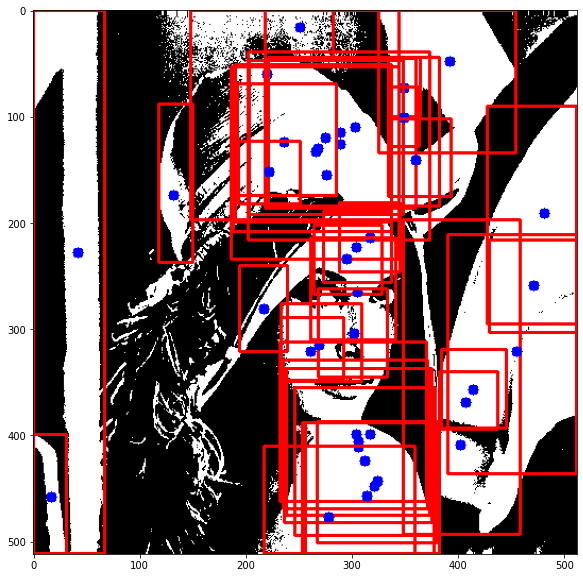

In [17]:
# 分群
# 1. 分析_第一次分組
fig,_ = plt.subplots(figsize=(10,10))
IDlist = []
IDlist.append(0)
IDtable = np.zeros((512,512),dtype=int)
ID = 1
for r, row in enumerate(binarize_lena):
  for c, pix in enumerate(row):
    if pix==0:
      continue
    if r:
      if c and IDtable[r-1,c-1]:
        IDtable[r,c] = IDtable[r-1,c-1]
      elif IDtable[r-1,c]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c])
        else:
          IDtable[r,c] = IDtable[r-1,c]
      elif c<511 and IDtable[r-1,c+1]:
        if IDtable[r,c]:
          IDlist[IDtable[r-1,c+1]]["neighbor"].add(IDtable[r,c])
          IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r-1,c+1])
        else:
          IDtable[r,c] = IDtable[r-1,c+1]
    if c and IDtable[r,c-1]:
      if IDtable[r,c]:
        IDlist[IDtable[r,c-1]]["neighbor"].add(IDtable[r,c])
        IDlist[IDtable[r,c]]["neighbor"].add(IDtable[r,c-1])
      else:
        IDtable[r,c] = IDtable[r,c-1]
    if not IDtable[r,c]:
      IDtable[r,c] = ID
      ID+=1
      IDlist.append({"up":512,"down":0,"left":512,"right":0,"count":0,"sum":[0,0],"neighbor":set()})
    IDlist[IDtable[r,c]]["up"] = min(IDlist[IDtable[r,c]]["up"],r)
    IDlist[IDtable[r,c]]["down"] = max(IDlist[IDtable[r,c]]["down"],r)
    IDlist[IDtable[r,c]]["left"] = min(IDlist[IDtable[r,c]]["left"],c)
    IDlist[IDtable[r,c]]["right"] = max(IDlist[IDtable[r,c]]["right"],c)
    IDlist[IDtable[r,c]]["count"] += 1
    IDlist[IDtable[r,c]]["sum"][0] += r
    IDlist[IDtable[r,c]]["sum"][1] += c
# 2. 合併
im = group_image(IDlist)
plt.imshow(im)
display(plt.gcf())
output.clear(wait=True)
for i in range(len(IDlist)-1,1,-1):
  if not IDlist[i]['neighbor']:
    continue
  belong = min(IDlist[i]['neighbor'])
  if belong == i:
    continue
  for j in IDlist[i]['neighbor']:
    if i==j:
      continue
    IDlist[j]['neighbor'].add(belong)
    if i in IDlist[j]['neighbor']:
      IDlist[j]['neighbor'].remove(i)
  IDlist[belong]["up"] = min(IDlist[belong]["up"],IDlist[i]["up"])
  IDlist[belong]["down"] = max(IDlist[belong]["down"],IDlist[i]["down"])
  IDlist[belong]["left"] = min(IDlist[belong]["left"],IDlist[i]["left"])
  IDlist[belong]["right"] = max(IDlist[belong]["right"],IDlist[i]["right"])
  IDlist[belong]["count"] += IDlist[i]["count"]
  IDlist[belong]["sum"][0] += IDlist[i]["sum"][0]
  IDlist[belong]["sum"][1] += IDlist[i]["sum"][1]
  IDlist.pop(i)
  im = group_image(IDlist)
  plt.imshow(im)
  display(plt.gcf())
  output.clear(wait=True)

In [ ]:
output.clear()